#### Own Neural Network Model

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
#number of neurons in each layer
no_inputs = 2 #input layer
hidden_layer = 2
output_layer = 2

#### Sigmoid and Sigmoid Gradient Function

In [50]:
def sigmoid(z):
    return 1/(1+(np.exp(-z)))

In [51]:
def gradient_sigmoid(z):
    zsigmoid = sigmoid(z)
    return np.multiply(zsigmoid, (1-zsigmoid))


#### Input Array, Response Array

In [52]:
x_input_matrix = np.ones(no_inputs+1).reshape(no_inputs+1, 1)

In [78]:
# 1st is bias term => x_input_matrix[0]
x_input_matrix[1], x_input_matrix[2] = 0.05, 0.1

In [79]:
#response
y_response = np.ones(output_layer).reshape(output_layer,1)
y_response[0], y_response[1] = 0.01,0.99

#### All Cost history, Max Iterations, Theta_one & Theta_two(all values store)

In [77]:
error_history = []
count_iterations = []
iterations = 200
#matrix 200*6( store all theta values) 
theta_one_plot_store = np.ones(iterations*6).reshape(iterations, no_inputs*(hidden_layer+1))
theta_two_plot_store = np.ones(iterations*6).reshape(iterations, hidden_layer*(output_layer+1))

In [80]:
#learning rate
alpha = 0.1
#seed for testing
np.random.seed(25)
#activation one = x_input_matrix(with bias)
a_one = x_input_matrix
#no of samples
samples = x_input_matrix.shape[1]

#### Own Forward Propagation Function

In [57]:
def forward_propagation(theta_one, theta_two):
    z_two = np.dot(theta_one, x_input_matrix)
    #print(z_two)
    #activation two
    a_two = sigmoid(z_two)
    a_two =np.insert(a_two,0,1,axis=0)
    #print(a_two)
    z_three = np.dot(theta_two,a_two)
    #print(z_three)
    a_three = sigmoid(z_three)
    #print(a_three)
    #e_total = ((y_response[0] - a_three[0])**2)/2 + ((y_response[1] - a_three[1])**2)/2
    return z_two,a_two,z_three,a_three

#### Own Backward Propagation Function

In [81]:
def back_propagation(z_two, a_two, z_three, a_three, theta_one, theta_two):
    #mean square error as the cost function
    mean_square_error = np.sum(np.square(np.subtract(a_three, y_response)))/2
    error_history.append(mean_square_error)
    #print(error_history)
    d3 = a_three - y_response
    #print(d3)
    z2_sigGrad = gradient_sigmoid(np.insert(z_two, 0, 1, axis=0))
    
    #computing delta d2,d3
    d2 = np.multiply(np.dot(theta_two.T, d3), z2_sigGrad)
    d2 =d2[1:,:]
    #print(d2)
    bigdelta_one = d2.dot(a_one.T)
    bigdelta_two = d3.dot(a_two.T)

    #print(bigdelta_one)
    #print(bigdelta_two)
    theta_one_gradient = bigdelta_one/samples
    theta_two_gradient = bigdelta_two/samples
    
    #updating theta values for next iterations
    theta_one  = np.subtract(theta_one, np.multiply(alpha,theta_one_gradient))
    theta_two = np.subtract(theta_two, np.multiply(alpha, theta_two_gradient))

    return theta_one, theta_two

#### Own Neural Network Function

In [82]:
def my_neural_network():
    #Initialize values in Θ(1) and Θ(2) to be uniformly distributed random numbers between 0.0 and 1.0.
    theta_one = np.random.uniform(0,1, no_inputs*(hidden_layer+1)).reshape(no_inputs, hidden_layer+1)
    theta_two = np.random.uniform(0,1, hidden_layer*(output_layer+1)).reshape(hidden_layer, output_layer+1)
    
    for i in range(0, iterations):
        z_two, a_two, z_three, a_three = forward_propagation(theta_one, theta_two)
        theta_one, theta_two = back_propagation(z_two, a_two, z_three, a_three, theta_one, theta_two)
        count_iterations.append(i)
        theta_one_plot_store[i] = theta_one.reshape(6)
        theta_two_plot_store[i] = theta_two.reshape(6)
    return theta_one, theta_two,error_history

In [83]:
trained_theta1, trained_theta2, errors= my_neural_network()

In [84]:
trained_theta1

array([[ 1.30632977,  0.60408721,  0.3224595 ],
       [ 0.42541172,  0.42307515,  0.1413256 ]])

In [85]:
trained_theta2

array([[-1.78847896, -1.38829055, -0.82380254],
       [ 1.78080097,  1.45552926,  0.90864139]])

In [86]:
#cost values are decreasing(mse is decreasing)
errors

[0.35236007870630687,
 0.3293887939256715,
 0.30674188212819309,
 0.28463770530075494,
 0.26327900331383136,
 0.24284083330870118,
 0.22346249130286064,
 0.20524368580844815,
 0.18824457825645885,
 0.17248885893251176,
 0.15796883277836488,
 0.14465151483101951,
 0.1324849064421014,
 0.12140385983176022,
 0.111335175446533,
 0.10220177485891688,
 0.093925935944379951,
 0.086431667638606186,
 0.07964634830040393,
 0.073501766954181702,
 0.067934702015857079,
 0.062887156647499401,
 0.05830635002777549,
 0.054144543566527287,
 0.050358762628114097,
 0.046910458631680071,
 0.043765143687412883,
 0.040892020013960917,
 0.038263618882106838,
 0.035855458307449864,
 0.033645724752503568,
 0.031614981330998042,
 0.029745903132440812,
 0.028023039063290376,
 0.026432598847325198,
 0.024962263402358076,
 0.023601016610109458,
 0.022338996445757181,
 0.021167363479746872,
 0.020078184869123182,
 0.019064332092851379,
 0.01811939083770819,
 0.01723758159673644,
 0.016413689693621711,
 0.015643003

#### Plot of Total Cost vs Iterations

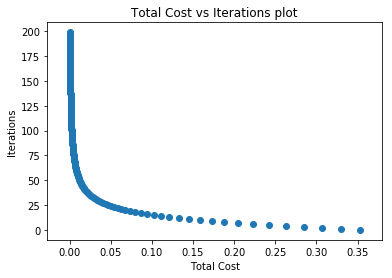

In [87]:
#Mean squared error is decreasing as you can see in the plot below.
plt.scatter(error_history,count_iterations)
plt.xlabel("Total Cost")
plt.ylabel("Iterations")
plt.title("Total Cost vs Iterations plot")

####  Plot of every parameter θ vs the iterations

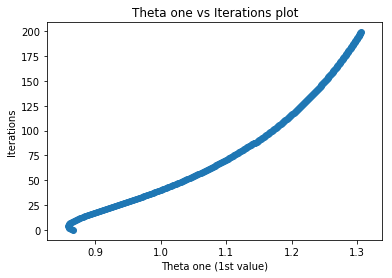

In [89]:
plt.scatter(theta_one_plot_store[:,0],count_iterations)
plt.xlabel("Theta one (1st value)")
plt.ylabel("Iterations")
plt.title("Theta one vs Iterations plot")

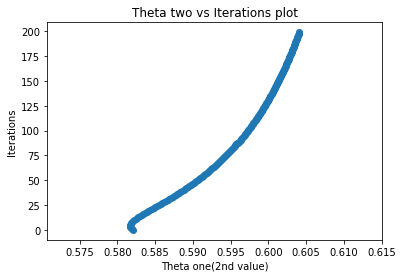

In [90]:
plt.scatter(theta_one_plot_store[:,1],count_iterations)
plt.xlabel("Theta one(2nd value)")
plt.ylabel("Iterations")
plt.title("Theta one vs Iterations plot")

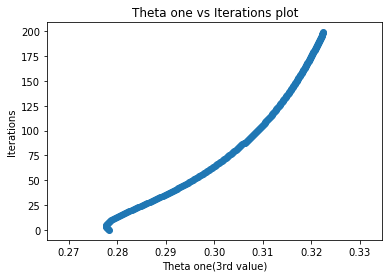

In [91]:
plt.scatter(theta_one_plot_store[:,2],count_iterations)
plt.xlabel("Theta one(3rd value)")
plt.ylabel("Iterations")
plt.title("Theta one vs Iterations plot")

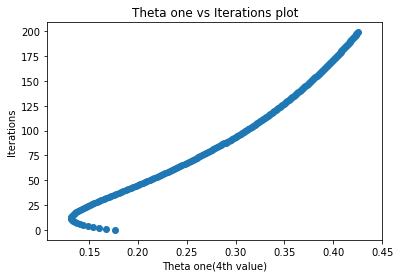

In [94]:
plt.scatter(theta_one_plot_store[:,3],count_iterations)
plt.xlabel("Theta one(4th value)")
plt.ylabel("Iterations")
plt.title("Theta one vs Iterations plot")

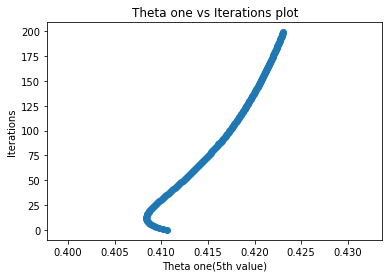

In [95]:
plt.scatter(theta_one_plot_store[:,4],count_iterations)
plt.xlabel("Theta one(5th value)")
plt.ylabel("Iterations")
plt.title("Theta one vs Iterations plot")

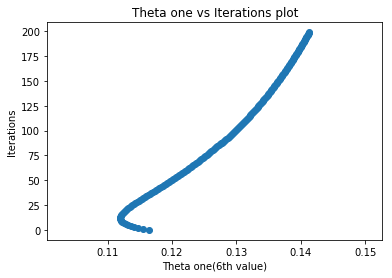

In [96]:
plt.scatter(theta_one_plot_store[:,5],count_iterations)
plt.xlabel("Theta one(6th value)")
plt.ylabel("Iterations")
plt.title("Theta one vs Iterations plot")

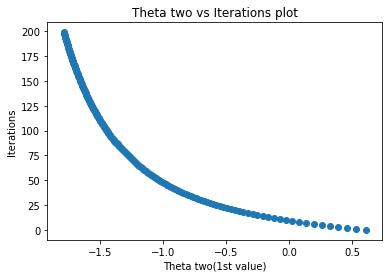

In [97]:
plt.scatter(theta_two_plot_store[:,0],count_iterations)
plt.xlabel("Theta two(1st value)")
plt.ylabel("Iterations")
plt.title("Theta two vs Iterations plot")

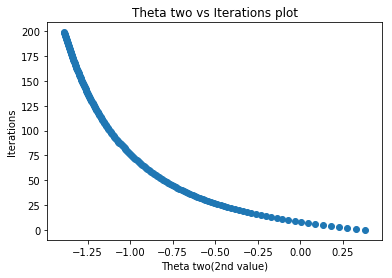

In [98]:
plt.scatter(theta_two_plot_store[:,1],count_iterations)
plt.xlabel("Theta two(2nd value)")
plt.ylabel("Iterations")
plt.title("Theta two vs Iterations plot")

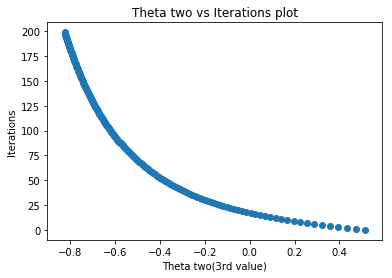

In [99]:
plt.scatter(theta_two_plot_store[:,2],count_iterations)
plt.xlabel("Theta two(3rd value)")
plt.ylabel("Iterations")
plt.title("Theta two vs Iterations plot")

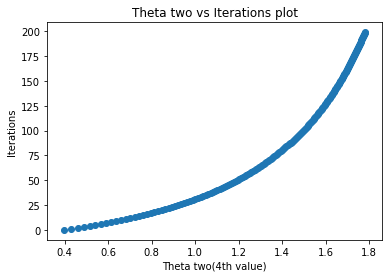

In [100]:
plt.scatter(theta_two_plot_store[:,3],count_iterations)
plt.xlabel("Theta two(4th value)")
plt.ylabel("Iterations")
plt.title("Theta two vs Iterations plot")

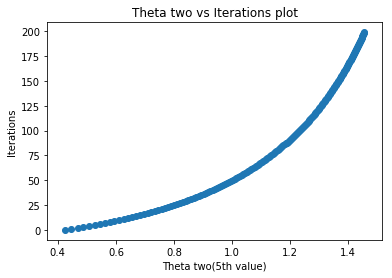

In [101]:
plt.scatter(theta_two_plot_store[:,4],count_iterations)
plt.xlabel("Theta two(5th value)")
plt.ylabel("Iterations")
plt.title("Theta two vs Iterations plot")

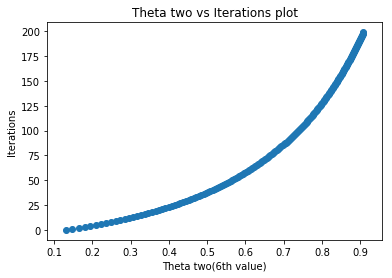

In [102]:
plt.scatter(theta_two_plot_store[:,5],count_iterations)
plt.xlabel("Theta two(6th value)")
plt.ylabel("Iterations")
plt.title("Theta two vs Iterations plot")